# MNIST
Importing libraries and shifting to GPU

In [1]:
#libraries required to make model
import tensorflow as tf   
from tensorflow import keras
import PIL

In [2]:
physical_device=tf.config.experimental.list_physical_devices('GPU')
print("No. of GPUs Available: ",len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0],True)

No. of GPUs Available:  1


In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.callbacks import EarlyStopping

In [4]:
pd.set_option('display.max_rows', 1000)
warnings.filterwarnings("ignore")

dftrain = pd.read_csv('D:/Outstanding Project/cnn/train.csv')
dftest = pd.read_csv('D:/Outstanding Project/cnn/test.csv')

#### Loading Data, Visualization, and Preprocessing
The values for all numbers come out to be pretty similar so it is improbable that the model will have a bias for a specific number. There weren't any null or missing values. The following steps involve reshaping the image to the desired format(28,28),  amd normalizing the data for better prediction.

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

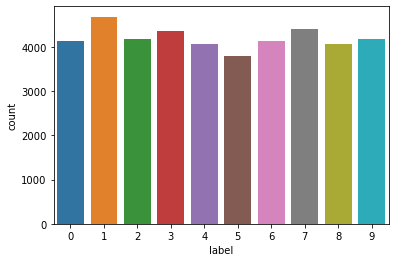

In [14]:
import seaborn as sns
Y_train = dftrain["label"]

# Drop 'label' column
X_train = dftrain.drop(labels = ["label"],axis = 1) 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [15]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [16]:
dftest.isnull().any().describe()
#no null values

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
IMG_SIZE = 28

x_train = dftrain.iloc[:,1:]
x_train = x_train.values.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = dftrain.iloc[:,0]
x_test = dftest
x_test = x_test.values.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_train = x_train/255.0
x_test = x_test/255.0

###### Example of an Image

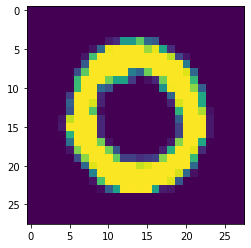

In [21]:
g = plt.imshow(x_train[1][:,:,0])

### Sequential CNN Model
We have used Sequential API which helps us define the model in a step by step manner.

Convolutional neural networks apply a filter to an input to create a feature map that summarizes the presence of detected features in the input. The Conv layer is the core building block of a Convolutional Network that does most of the computational heavy lifting. In simple terms, we are just taking a small window and picking up samples from the image.

Every Convulution is layer is followed by a layer for batch normalization and a layer for relu activation. The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. ReLU is important because it does not saturate; the gradient is always high (equal to 1) if the neuron activates. As long as it is not a dead neuron, successive updates are fairly effective. ReLU is also very quick to evaluate.

Batch normalization is a method used to make artificial neural networks faster and more stable through normalization of the input layer by re-centering and re-scaling. Basically this is used for accelerating the whole process.

The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarising the features lying within the region covered by the filter. It reducea the dimensions of the feature maps, thereby reducing the trainable parameters. As further operations are performed on summarised features instead of precisely positioned features generated by the convolution layer, the model becomes more robust.

The dense layer is given the value of 10 as we have 10 labels in our dataset
Dropout is being used for optimization. It is a regularization technique in which we ommit units randomly to reduce the chances of overfitting of a model.
Softmax is being used for the final activation layer as it “returns a probability distribution over the target classes in a multiclass classification problem”

In [6]:
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 10,
                              restore_best_weights = True)



model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape = x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1

###  Loss Function and Optimizer¶
We have used adam for optimizaion. It is bit different from the textbook, gradient descent. Gradient descent maintains a single learning rate for all weight updates but Adam allows us to add decay which slows down the learning rate. As we move closer to our optimized value the incresed decay helps as it causes less deviation in the weights.

Loss function being used here is called categorical crossentropy as it gave better results. I trained it to 100 epochs just because I had earlystopping added with validation_accuracy as the metric.

In [8]:
model.compile(optimizer = 'adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy'])

EPOCHS = 100

history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=32, validation_split=0.2, callbacks=[earlystopping])

Epoch 1/100
1050/1050 [==============================] - 9s 9ms/step - loss: 0.1630 - accuracy: 0.9486 - val_loss: 0.0444 - val_accuracy: 0.9861
Epoch 2/100
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0781 - accuracy: 0.9747 - val_loss: 0.0444 - val_accuracy: 0.9861
Epoch 3/100
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0613 - accuracy: 0.9812 - val_loss: 0.0460 - val_accuracy: 0.9873
Epoch 4/100
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0574 - accuracy: 0.9815 - val_loss: 0.0384 - val_accuracy: 0.9890
Epoch 5/100
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0492 - accuracy: 0.9842 - val_loss: 0.0374 - val_accuracy: 0.9894
Epoch 6/100
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0424 - accuracy: 0.9859 - val_loss: 0.0400 - val_accuracy: 0.9880
Epoch 7/100
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0397 - accuracy: 0.9867 - val_loss: 0.0292 - val_ac

### Visualiztion
Validation accuracy is around 99.4% which is pretty good. If we look at the loss curve and the accuracy curve we can see that they change quickly and their rate of change decreases with time which is desirable 

In [9]:
print("Max. Validation Accuracy: {}%".format(round(100*max(history.history['val_accuracy']), 2)))

Max. Validation Accuracy: 99.39%


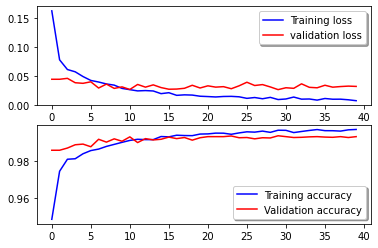

In [24]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

#### Predictions for the test set

In [10]:
predictions = model.predict([x_test])
solutions = []
for i in range(len(predictions)):
    solutions.append(np.argmax(predictions[i]))

In [11]:
final = pd.DataFrame()
final['ImageId']=[i+1 for i in dftest.index]
final['Label']=solutions
final.to_csv('submission.csv', index=False)

#### Confusion matrix
Just split the training data to get random data for confusion matrix. Although we know that our model isnt overfitting because test accuracy is pretty close to train accuracy, Confusion Matrix is a goodway to look for errors in our model. The confusion matrix informs us that we had 16 incorrect predictions, if we have a look at few of them, we will realize that the model is performing well as most of the incorrect predictions are ambiguous in nature.
######  PS: Look at the last image 

In [31]:
from sklearn.model_selection import train_test_split
x_cfd, x_cf, y_cfd, y_cf = train_test_split(x_train, y_train, test_size = 0.3, random_state=2)

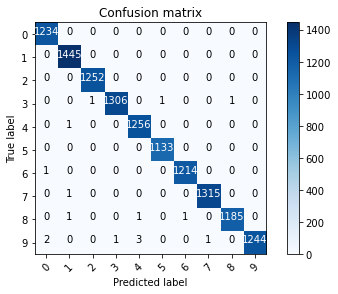

In [49]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_cf)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = y_cf
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

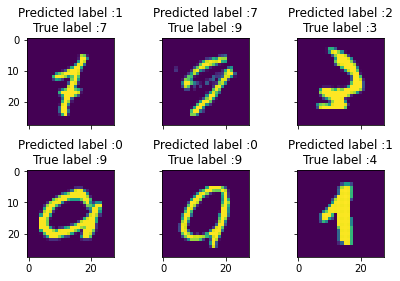

In [124]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_cf[errors]
Y_true_errors_duplicate=[3,6,8,9,8,9,7,9,9,4,3,9,3,9,9,8]
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}".format(pred_errors[error])+"\nTrue label :{}".format(obs_errors[error]))
            n += 1
    fig.tight_layout()
            
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors,Y_true_errors_duplicate)
